# Generating samples from synthetic time-series
Saleh Rezaeiravesh, salehr@kth.se <br/>
SimEx/FLOW, Engineering Mechanics, KTH Royal Institute of Technology, Stockholm, Sweden

### Introduction
We can generate samples from a synthetic time-series, for insance, from the following __autoregressive__ model:
$$
\begin{eqnarray}
f_{i} &=& a_{1}f_{i-1} +a_{2}f_{i-2} + \cdots + a_{p}f_{i-p} + \varepsilon_i\\
      &=& \sum_{k=1}^p a_{k} f_{i-k} + \varepsilon_i \,,\quad i=1,2,\ldots,n
\end{eqnarray}
$$
In this definition $\{a_i\}$ are known coefficients, $p$ specifies the lag, and $\mathbf{\varepsilon}$ is the random noise which is assumed to be iid. 

### Implementation

In **UQit-ts**, different models for synthetic time-series are implemented in the class `syntheticData`. 
New models can be easily added.


To instantiate an object from this class, we need to provide `n`, the number of samples, and `opts` as the options. 
The options contain the followings:
* `'type'`: time-series model
* `'dt'`: $\Delta t$, time-step size in the series (can be either constant or variable)
* `'noiseSdev'`: Standard deviation of the noise 
* `'writeInFile'`: `bool`, if `True`, the generated smaples are written in a file. 
* `'writeFile'`: (optional) path and name of the file in case the generated data are to be saved on disk.
* `'coefs'`: (optional) List of coefficients $[a_{1},a_{2},\cdots,a_{p}]$ in case `'type':'synData3'`. If `'coefs'` is empty, a set of default values are used with `synData3`.

Here is the list of current options for synthetic time-series:
* `'type':'synData1'`: $a_{1}=0.9$, $a_{2}=0.05$, $\varepsilon_i\sim \mathcal{N}(0,\sigma_d^2)$ where $\sigma_d$ is set by `'noiseSdev'`.
* `'type':'synData2'`: Eq. (33) in [Russo and Luchini, 2017.](https://www.sciencedirect.com/science/article/pii/S0021999117305077)
* `'type':'synData3'`: A time series with user-provided list of coefficients $[a_{1},a_{2},\cdots,a_{p}]$. The default coefficients are taken from section 4.1 in [Beyhaghi et al., 2018.](https://deepai.org/publication/uncertainty-quantification-of-the-time-averaging-of-a-statistics-computed-from-numerical-simulation-of-turbulent-flow)


### Example 1
Generate $n$ samples of a synthetic time-series, plot the samples and do some preliminary statistical analysis.

Import Python's essential libraries

In [1]:
import sys
import os
import numpy as np

Import synthetic data generator from __UQit-ts__

In [2]:
sys.path.append(os.getenv("UQit_ts_path"))
from synDataGen_ts import syntheticData
import plot_ts
import stats_ts
import general_ts

Set the number of samples and values of `synOpts` dictionary

In [3]:
n=20000   #no of samples
synOpts={'type':'synData2',   
         'dt':1,   #time-step size = 1
         'noiseSdev':0.1,
         'writeInFile':False}

Generate the samples

In [4]:
t,f=syntheticData(n,synOpts).gen()

... Generating n=20000 synthetic time-series samples.
    using method synData2
    with noise sdev = 0.1


Plot the samples and associated PDF

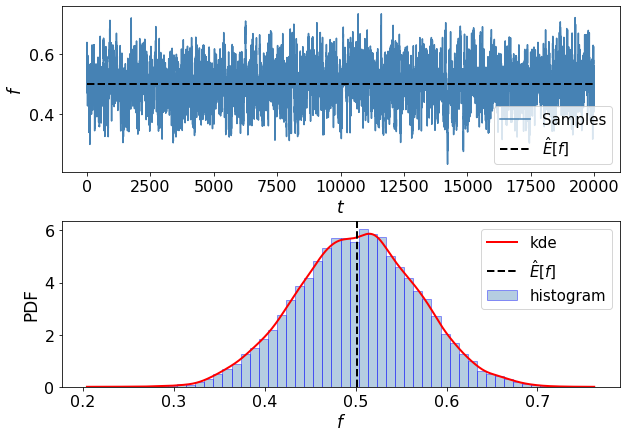

In [5]:
plot_ts.histoPlot_single(t,f,{})

Do some preliminary analyses on the generated samples

In [6]:
stats_ts.moments(t,f)

Note: assumption is that the samples are equi-spaced over time!
    mean      std     skew      kurt    superkurt
--------------------------------------------------
0.501302  0.0664397  -0.0215298  2.87475  13.1744


{'mean': 0.5013015695257322,
 'std': 0.06643970542357919,
 'skew': -0.021529820517015803,
 'kurt': 2.874747825712339,
 'superSkew': 13.174367871848096}

### Example 2

Generate $n$ samples from a time-series with user-defined coefficients

... Generating n=1000 synthetic time-series samples.
    using method synData3
    with noise sdev = 0.1


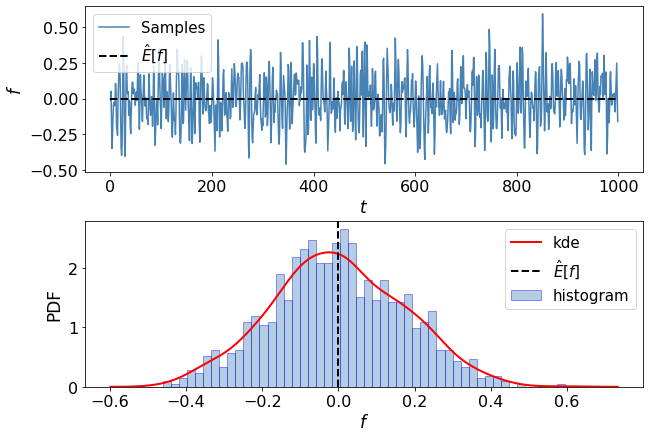

In [7]:
n=1000   #no of samples
synOpts2={'type':'synData3',   
         'dt':1,   
         'noiseSdev':0.1,
         'coefs':[1.1,-.9,0.3,-0.1],
         'writeInFile':False}

t2,f2=syntheticData(n,synOpts2).gen()
plot_ts.histoPlot_single(t2,f2,{})

### Example 3

Generate $n1$ samples with varying $\Delta t$ and then map (interpolate) them to a time-series of size $n2$ with fixed $\Delta t$. Such mapping stage is important noting that working with fixed-$\Delta t$ samples would be either advantageous or necessary when applying unicertainty quantification techniques.

In [8]:
n3=1000   #no of samples in the original series
synOpts3={'type':'synData2',            
         'dt':(np.random.rand(n3-1)+0.1)*np.ones(n3-1), #random dt
         'noiseSdev':0.1,         
         'writeInFile':False}
t3,f3=syntheticData(n3,synOpts3).gen()



... Generating n=1000 synthetic time-series samples.
    using method synData2
    with noise sdev = 0.1


The interpolation tools are implemented in `general_tUQ`:

In [9]:
#equispaced time samples
t3u=np.linspace(np.min(t3),np.max(t3),n3)
f3u=general_ts.interp1D(t3,f3,t3u,kind_='linear')

...... Interpolating 1000 samples to a series of 1000 samples.
       using linear method.


Note that there are different methods for interpolation including `'linear'`, `'quadratic'`, `'cubic'` which can be looked up [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html). 
Let's plot the original and mapped time-series

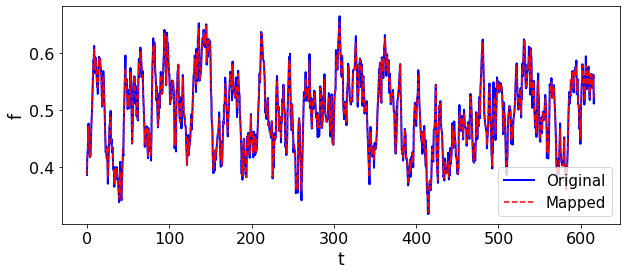

In [10]:
general_ts.interp1d_plot(t3,f3,t3u,f3u)